<a href="https://colab.research.google.com/github/DFS-33/Limpeza_dados_python/blob/main/Limpeza_tratamento_Douglas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importando pacotes 
import pandas as pd
import statistics as sts
import seaborn as sborn

### Regra do negócio: 
Analisando retenção de clientes (Churn) em um conjunto de dados bancários dos estados da região Sul.

Antes de realizar a criação dos modelos de Machine Learning, precisamos Analizar os dados de formar explanatória e efetuar os devidos tratamentos dos dados.

<br>
<br>

#### Dicionário de dados
ID -           (Identificador) <br>
Score -        (Pontuação de Score para cada cliente) <br>
Estado -       (Unidade federativa) <br>
Genero -       (Sexo) Masculino/Feminino  <br>
Idade -        (idade)  <br>
patrimonio-    (Bens) 0 para não, 1 para sim   <br>
produtos -     (servicos contratados) <br>
temCartCredito (Possuí cartão de crédito) <br>
Ativo -        (0 poucas movimentações, 1 muitas movimentações) <br>



In [2]:
# importando dados 
df = pd.read_csv('/content/Churn.csv', sep =';')

In [3]:
# Lendo cabeçalho dos dados
df.head()

# Podemos verificar que as colunas não estão nomeadas

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [4]:
#Visualizando o shape dos dados 999 linhas e 12 colunas
df.shape

(999, 12)

In [5]:
# Definindo os nomes das colunas
df.columns = ['id','Score','Estado','Genero','Idade','Patrimonio','Saldo','Produtos','temCartCredito','Ativo','Salario','Saiu']

In [6]:
df.head()

,id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,temCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [7]:
# Analisando maiores informações das colunas.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              999 non-null    int64  
 1   Score           999 non-null    int64  
 2   Estado          999 non-null    object 
 3   Genero          991 non-null    object 
 4   Idade           999 non-null    int64  
 5   Patrimonio      999 non-null    int64  
 6   Saldo           999 non-null    int64  
 7   Produtos        999 non-null    int64  
 8   temCartCredito  999 non-null    int64  
 9   Ativo           999 non-null    int64  
 10  Salario         992 non-null    float64
 11  Saiu            999 non-null    int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 93.8+ KB


# Análise exploratória dos dados
- Analisando colunas categóricas (Estado,Genero e salario)

In [8]:
# Explorando colunas categóricas
agrupado = df.groupby(by='Estado').size();agrupado

# Notamos que existe valores da coluna Estado fora do padrão Exemplo: (RP,TD) não existe esses estados
# O estado de SP não faz parte da regra de negócio.


Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

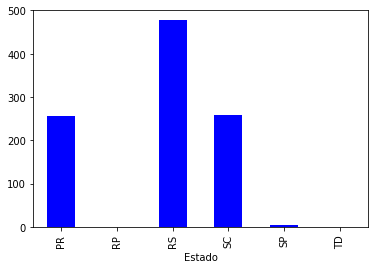

In [9]:
# Visualizando os dados agrupados através de gráfico de barras.
agrupado.plot.bar(color = 'blue')

In [10]:
# Visualizando os registros do dataframe que o Estado é igual a SP
df[df['Estado'] =='SP']

# Confirmamos realmente que são 4 registros de Estado para São Paulo.

,id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,temCartCredito,Ativo,Salario,Saiu
28,29,574,SP,Feminino,43,3,14134943,1,1,1,10018743.0,0
32,33,553,SP,Masculino,41,9,11011254,2,0,0,8189881.0,0
55,56,619,SP,Masculino,43,1,12521192,1,1,1,11341049.0,0
75,76,735,SP,Feminino,21,1,17871819,2,1,0,22388.0,0


In [11]:
# Agrupando variável categorica (Genero)
agrupado = df.groupby(by='Genero').size();agrupado

# Analisando as informações temos valores representando a mesma informação que teremos que tratar. 
# Exemplo: F,Fem,Feminino

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

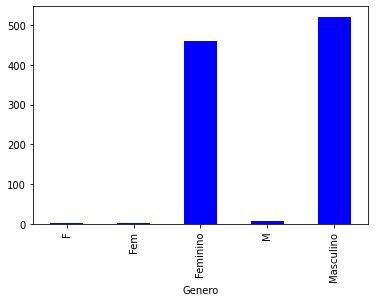

In [12]:
# Visualizando os dados agrupados da coluna Genero, utilizando gráfico de barras.
agrupado.plot.bar(color='blue')

### Analisando variáveis numéricas

In [13]:
# Explorando colunas numéricas  coluna Score -- Pontuação de Score para cada cliente
# Notamos que o valor da média para a mediana não tem muita diferença. 

df['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

In [14]:
mediana_score = sts.median(df['Score']);mediana_score

653

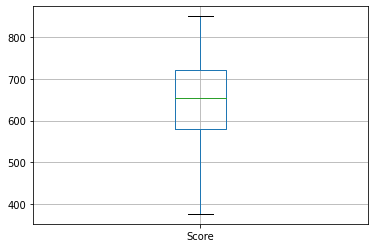

In [15]:
# Visualizando um box plot podemos notar a ausência de outliers
df.boxplot('Score')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Score')

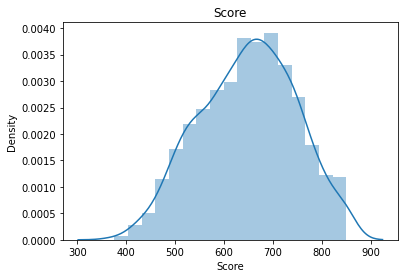

In [16]:
# Analisando o histograma a coluna Score tende a uma distribuição normal. 
sborn.distplot(df['Score']).set_title('Score')

In [17]:
df.head()

,id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,temCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [18]:
# Analisando a variavel Idade
df['Idade'].describe()
# Notamos que existe algumas idades fora do padrão exemplo (valor minimo -20 e valor máximo de 140)

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Idade')

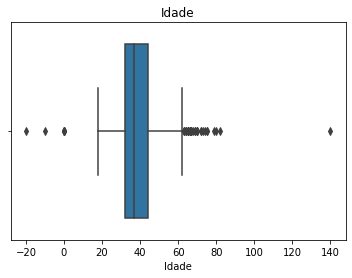

In [19]:
# Gerando um boxplot da coluna Idade utilizando o Seaborn
# Confirmamos os valores outliers, que precisamos tratar para não afetar o modelo de machine Learning futuramente.
sborn.boxplot(df['Idade']).set_title('Idade')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Idade')

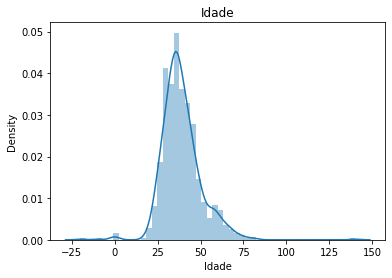

In [20]:
# Gerando um histograma utilizando Seaborn
sborn.distplot(df['Idade']).set_title('Idade')

In [21]:
df.head()

,id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,temCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [22]:
# Analisando a coluna saldo
df['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Saldo')

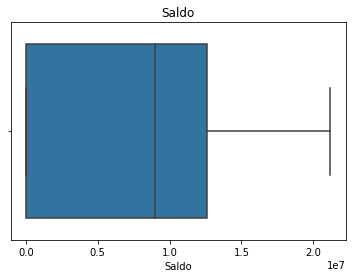

In [23]:
# Gerando box plat para a coluna Saldo
sborn.boxplot(df['Saldo']).set_title('Saldo')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Saldo')

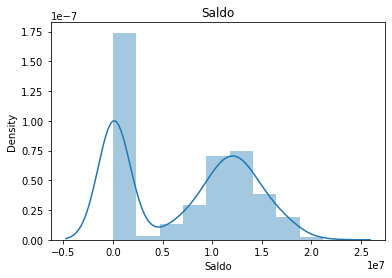

In [24]:
# Gerando um histograma da váriavel Saldo
# Podemos notar que a maioria dos dados estão concentrados no valor 0
sborn.distplot(df['Saldo']).set_title('Saldo')

In [25]:
# Analisando a coluna Salario 
# Temos uma diferença significante entre a média e a mediana
df['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Salario')

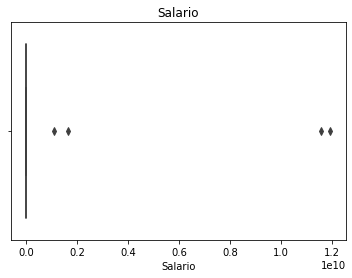

In [26]:
# Gerando box plot da coluna Salario 
# O gráfico sai distorcido e com outlers
sborn.boxplot(df['Salario']).set_title('Salario')

In [27]:
# Verificando se existe valores NA no conjunto de dados.
# Temos duas colunas com valores nulos (GENERO e Salario)
df.isnull().sum()

id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
temCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

# Tratamento dos dados

In [28]:
# Tratamento valores NA para a coluna salario, informando a mediana

# Calculando a mediana e atribuindo a variavel mediana
mediana = sts.median(df['Salario'])
mediana

70518.0

In [29]:
# Substituindo valores NA pela mediana 
df['Salario'].fillna(mediana,inplace=True)

In [30]:
# Analisando se existe valores NA na coluna salario 
df.isnull().sum()

id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
temCartCredito    0
Ativo             0
Salario           0
Saiu              0
dtype: int64

In [31]:
# Efetuando o tratamento da coluna Genero 
# Nesta situação, temos valores categoricos diferentes, representando a mesma informação. 

agrupado=df.groupby(by ='Genero').size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [32]:
# Verificando a ocorrência de valores NA na coluna Genero 
df['Genero'].isnull().sum()

8

In [33]:
# Substituindo valores NA com a palavra Masculino, utilizando o conceito da moda.
df['Genero'].fillna('Masculino',inplace=True)

In [34]:
# Consultando a existência de valores nulos na coluna genero
df['Genero'].isnull().sum()

0

In [35]:
# Padronização da coluna Genero utilizando o método loc para filtrar e substituindo os valores 
df.loc[df['Genero'] == 'M','Genero'] = 'Masculino'
df.loc[df['Genero'].isin(['Fem','F']), 'Genero'] = 'Feminino'

In [36]:
# Após tratamento da coluna Genero, temos o agrupamento correto.
agrupado=df.groupby(by ='Genero').size()
agrupado

Genero
Feminino     464
Masculino    535
dtype: int64

In [37]:
# Tratando a coluna Idade 

df['Idade'].describe()
# Temos idades -20 e 140 anos e precisamos tratar

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [38]:
# Utilizando o metodo Loc para selecionar os outliers de idade menor que 20 e maiores que 120
df.loc[(df['Idade'] < 0 ) | (df['Idade'] > 120 )]

,id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,temCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [39]:
# Tratando os valores outliers da coluna idade utilizando a mediana
mediana = sts.median(df['Idade'])
mediana

37

In [40]:
# Substituir os outliers da coluna Idade pela Mediana
df.loc[(df['Idade'] < 0 ) | (df['Idade'] > 120 ), 'Idade'] = mediana

In [41]:
# Fazendo uma nova verificação dos resumos estatísticos
df['Idade'].describe()

count    999.000000
mean      38.903904
std       10.672421
min        0.000000
25%       32.000000
50%       37.000000
75%       44.000000
max       82.000000
Name: Idade, dtype: float64

In [42]:
# Verificação se ainda existe registros com idade menor que 0 e maior que 120
df.loc[(df['Idade'] < 0 ) | (df['Idade'] > 120 )]

,id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,temCartCredito,Ativo,Salario,Saiu


In [43]:
# Verificação de dados duplicados pelo ID 
df[df.duplicated(['id'],keep=False)]

# Temos 1 registro duplicados em nosso dataset.

,id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,temCartCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [44]:
# Excluindo duplicados pelo ID
df.drop_duplicates(subset='id', keep="first", inplace=True)
# Buscamos duplicados
df[df.duplicated(['id'],keep=False)]

,id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,temCartCredito,Ativo,Salario,Saiu


In [45]:
#Tratando a coluna Estado 
agrupado = df.groupby(by="Estado").size()
agrupado

Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [46]:
# Substituindo os valores dos estados ['RP','SP','TD'] aplicando a MODA
df.loc[df['Estado'].isin(['RP','TD','SP']),'Estado'] = 'RS'

In [47]:
# fazendo uma nova verificação nos registros
agrupado = df.groupby(by="Estado").size()
agrupado

Estado
PR    257
RS    483
SC    258
dtype: int64

In [48]:
# Tratando os valores outliers da coluna Salário, considerando 2 desvio padrao
# Calculando o desvio padrao
desvio = sts.stdev(df['Salario'])
desvio

528988918.4679201

In [49]:
# Verificando se existe salarios superiores a dois desvios padroes
df.loc[df['Salario'] >= 2 * desvio]
# Temos 4 registros em que o salário foge dos padrões

,id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,temCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [50]:
# Tratando outliers pela mediana 
mediana = sts.median(df['Salario'])
mediana

8637195.5

In [51]:
# Atualizando os dados 
df.loc[df['Salario'] >= 2 * desvio,'Salario'] = mediana
# Checando os valores
df.loc[df['Salario'] >= 2 * desvio]

,id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,temCartCredito,Ativo,Salario,Saiu


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Salario')

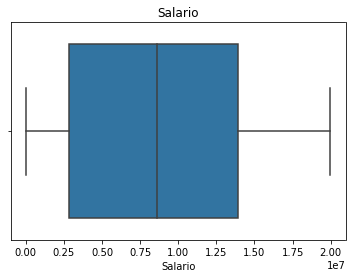

In [52]:
# Gerando um novo Box plot após tratamento de outliers
sborn.boxplot(df['Salario']).set_title('Salario')

In [ ]:
# Analisando a tipagem dos dados
df.dtypes

In [ ]:
df.head()

# Limpeza e tratamento finalizado